# Data Exploration

## Preliminaries:  load libraries

In [2]:
import numpy as np              # library for array creation and manipulation 
import pandas as pd             # structures and methods for data analysis
import matplotlib.pyplot as plt # graphical plotting library
import mpl_toolkits.mplot3d     # module to support 3D plotting
import sklearn as skl           # machine learning library
import sklearn.metrics as mt    # cross-validation metrics library 
from sklearn.preprocessing import StandardScaler # object for z-scoring numerical features

import nonparametric_stats as nps

## Import data into Pandas dataframe

In [3]:
dataFilePath = './data/online_shoppers_intention.csv'
shopIntent_df = pd.read_csv(dataFilePath, header=0, delimiter=',')
featureNames = shopIntent_df.columns.values

## Inspect resultant dataframe

In [4]:
shopIntent_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Detect nulls in dataframe, if any

In [5]:
shopIntent_df.isnull().values.any()

False

Thankfully, the dataframe appears to be complete with no holes in any of the columns.

### Examine object types of values of various features 

In [6]:
shopIntent_df.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype=object)

In [7]:
type(shopIntent_df['Revenue'].values[0])

numpy.bool_

In [8]:
type(shopIntent_df['PageValues'].values[0])

numpy.float64

In [9]:
type(shopIntent_df['Month'].values[0])

str

In [10]:
type(shopIntent_df['Weekend'].values[0])

numpy.bool_

In [11]:
type(shopIntent_df['VisitorType'].values[0])

str

In [12]:
type(shopIntent_df['SpecialDay'].values[0])

numpy.float64

In [13]:
np.unique(shopIntent_df['SpecialDay'])

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

The dataset is comprised of mixed object types.  Depending on the predictive model chosen,  non-numeric values (e.g. strings and booleans) may need to be converted to numeric values later on. 

### Create a dict of (unique) value sets for each feature

This dictionary will be used to calculate revenue occurrence probabilities for categorical features in sections below.

In [14]:
feature_diversity = {c: np.unique(shopIntent_df[c].values) for c in shopIntent_df.columns.values}
feature_diversity

{'Administrative': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 26, 27]),
 'Administrative_Duration': array([0.00000000e+00, 1.33333333e+00, 2.00000000e+00, ...,
        2.65731806e+03, 2.72050000e+03, 3.39875000e+03]),
 'Informational': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 24]),
 'Informational_Duration': array([0.00000000e+00, 1.00000000e+00, 1.50000000e+00, ...,
        2.25203333e+03, 2.25691667e+03, 2.54937500e+03]),
 'ProductRelated': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  

## Calculate probability of Revenue occurrence

- For each of the categorical features in the dataset, calculate the probability that revenue was generated given each category in the feature.

### Use Bayes' Formula to calulate probability of a "hit" given a particular categorical value of a feature 

In [15]:
# Workthrough calculation of Bayes' formula to calculuate conditional hit probabilities
p_Hit = np.sum(shopIntent_df['Revenue'].values) / shopIntent_df['Revenue'].values.shape[0]

p_Miss = np.sum(~shopIntent_df['Revenue'].values) / shopIntent_df['Revenue'].values.shape[0]

p_OS = {f:np.sum(shopIntent_df['OperatingSystems'].values == f) / shopIntent_df['OperatingSystems'].values.shape[0] 
        for f in feature_diversity['OperatingSystems']}

p_OS_given_Hit = {os: np.sum(shopIntent_df['OperatingSystems'].values[
    shopIntent_df['Revenue'].values == True] == os) / (shopIntent_df['OperatingSystems'].values[
    shopIntent_df['Revenue'].values == True]).shape[0]  
                  for os in feature_diversity['OperatingSystems']}

p_OS_given_Miss = {os: np.sum(shopIntent_df['OperatingSystems'].values[
    shopIntent_df['Revenue'].values == False] == os) / (shopIntent_df['OperatingSystems'].values[
    shopIntent_df['Revenue'].values == False]).shape[0]  
                  for os in feature_diversity['OperatingSystems']}

p_Hit_given_OS = {os: p_OS_given_Hit[os] * p_Hit / p_OS[os] 
                  for os in feature_diversity['OperatingSystems']}

p_OS_by_Sum = {os: p_OS_given_Hit[os]*p_Hit + p_OS_given_Miss[os]*p_Miss 
               for os in feature_diversity['OperatingSystems']}

# Just verifying the "shortcut" for the denominator here...
#print(p_OS)
#print(p_OS_by_Sum)


### Generalize above into modular function so that we can investigate other features this way

In [16]:
def BayesHitProbGivenFeatCat(targsVec, featureVec, targVal, featValuesSet):
    
    p_Hit = np.sum(targsVec == targVal) / targsVec.shape[0]
    
    p_featVal = {fv:np.sum(featureVec == fv) / featureVec.shape[0] 
                 for fv in featValuesSet}
    '''
    p_featVal_given_Hit = {fv:np.sum(targsVec[featureVec == fv] == targVal
                               ) / np.sum(targsVec == targVal) 
                           for fv in featValuesSet}
    '''
    p_featVal_given_Hit = {fv: np.sum(featureVec[targsVec == targVal] == fv
                                     ) / (featureVec[targsVec == targVal]).shape[0]
                           for fv in featValuesSet}
    
    p_Hit_given_featVal = {fv: p_featVal_given_Hit[fv] * p_Hit / p_featVal[fv] 
                           for fv in featValuesSet}
    
    return p_Hit_given_featVal

### Direct calculation of revenue probability given a feature category

In [17]:
def RevProbGivenFeatCat(targsVec, featureVec, targVal, featValuesSet):
    return {fv: np.sum(targsVec[featureVec == fv] == targVal
                      ) / targsVec[featureVec == fv].shape[0] for fv in featValuesSet}
    

Since we have full access to the sample space, conditional revenue probabilities can be calculated directly--we do not need to use Bayes' forumula after all.

### Define function to report counts of a response value across feature categories

- Quick function to count the number of revenue generating occurrences per category of a specified feature.

In [18]:
def HitCountsGivenFeatCat(targsVec, featureVec, targVal, featValuesSet): 
    hitCounts = {fv: np.sum(targsVec[featureVec == fv] == targVal) 
                 for fv in featValuesSet}
    return hitCounts

### Define a function to plot proportions of a response value across feature categories  

In [19]:
def PlotProportionsOfTargetsAcrossFeatCats(targsVec, featuresVec, targValSetList):
    featureValSet = np.unique(featuresVec)
    countsArray = np.array([np.array([np.sum([np.array([(targVal in targValSet) 
                                              for targVal in targsVec[featuresVec == featureVal]])])  
                                      for featureVal in featureValSet])
                            for targValSet in targValSetList])
    
    labelIndex = 0
    labels = [str(s) for s in targValSetList]
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(11, 7)
    
    for ca in countsArray:
        ax.plot(featureValSet, ca/np.sum(ca), label=labels[labelIndex])
        labelIndex += 1
    ax.set_xlabel('feature category')
    ax.set_ylabel('proportion of target values')
    ax.legend()
    return ax

### Examine revenue probability by OS type

In [20]:
# Compare output from the two functions--should be nearly equal
osRevProbs = BayesHitProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                             shopIntent_df['OperatingSystems'].values,
                             True,
                             feature_diversity['OperatingSystems'])
# Compare output
print(osRevProbs)

osRevProbs_2 = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                             shopIntent_df['OperatingSystems'].values,
                             True,
                             feature_diversity['OperatingSystems'])
print(osRevProbs_2)


{1: 0.14661508704061893, 2: 0.17497348886532343, 3: 0.10489236790606654, 4: 0.17782426778242677, 5: 0.16666666666666666, 6: 0.10526315789473684, 7: 0.14285714285714285, 8: 0.21518987341772147}
{1: 0.14661508704061896, 2: 0.17497348886532343, 3: 0.10489236790606654, 4: 0.17782426778242677, 5: 0.16666666666666666, 6: 0.10526315789473684, 7: 0.14285714285714285, 8: 0.21518987341772153}


- Bayes' and direct methods of calculating revenue probabilities are equivalent. 
- Operating system type 8 had highest associated probability of producing revenue within the `OperatingSystem` feature (p = 0.215). OS types 3 and 6, had the lowest (p = 0.105). 

Text(0.5, 1.0, 'Proportion of Target values across OperatingSystems categories')

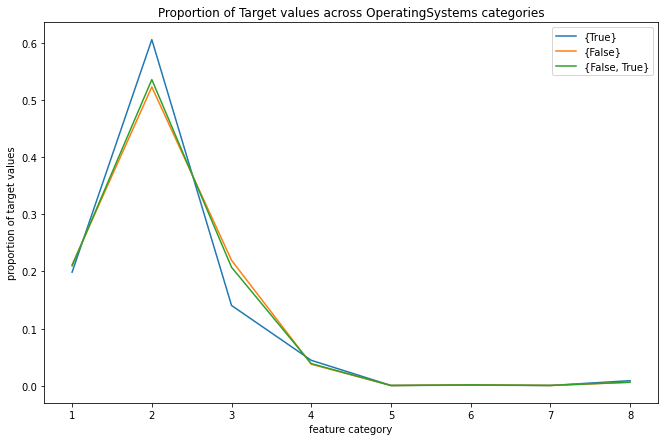

In [21]:
ax = PlotProportionsOfTargetsAcrossFeatCats(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['OperatingSystems'].values,
                                      [{True},{False},{True,False}])

ax.set_title('Proportion of Target values across OperatingSystems categories')

- Operating system types are not uniformly distributed in this dataset.
- Proportion of revenue-producing events (`{True}`, blue) increased and decreased for Operating system types 2 and 3 respectively compared to non-Revenue-producing (`{False}`, orange) and total (`{False, True}`, green) events in the same categories.

Given variation in probabilities and proportions across categories, we will keep `OperatingSystem` as feature in the predictive model. 

### Revenue probability by browser type

In [22]:
browserRevHitProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Browser'].values,
                       True,
                       feature_diversity['Browser'])
browserRevHitProbs

{1: 0.14825345247766045,
 2: 0.15362391659339278,
 3: 0.047619047619047616,
 4: 0.1766304347826087,
 5: 0.1841541755888651,
 6: 0.11494252873563218,
 7: 0.12244897959183673,
 8: 0.15555555555555556,
 9: 0.0,
 10: 0.19631901840490798,
 11: 0.16666666666666666,
 12: 0.3,
 13: 0.26229508196721313}

- Browser types 9 and 3 appear have small or zero hit probabilities. 
- Types 12 and 13 have comparatively high Revenue probabilities.

Text(0.5, 1.0, 'Proportion of Target values across Browser categories')

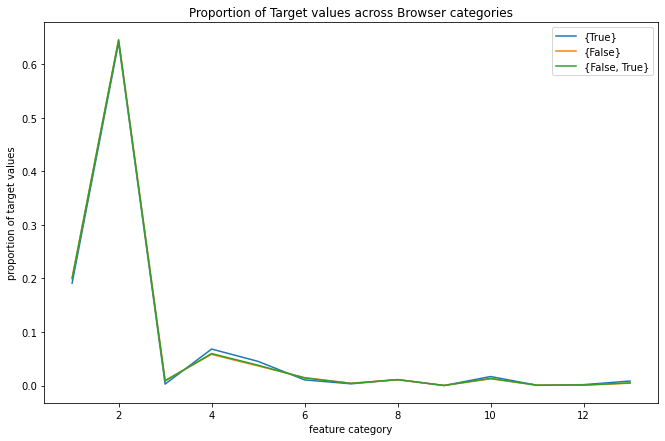

In [23]:
ax = PlotProportionsOfTargetsAcrossFeatCats(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Browser'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Browser categories')

- Browser types are not uniformly distributed in this dataset.

- Proportions of `True`-, `False`- and either-valued revenue transactions are equivalent across all browser types.

Though proportions do not vary across target categories (`True`, `False` and `True or False`), there is enough spread in the revenue probabilities to consider keeping  `Browser` as a feature.

### Revenue probability by Region

In [24]:
RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Region'].values,
                       True,
                       feature_diversity['Region'])

{1: 0.16129707112970712,
 2: 0.16549295774647887,
 3: 0.14523512276321265,
 4: 0.14805414551607446,
 5: 0.16352201257861634,
 6: 0.1391304347826087,
 7: 0.15637319316688567,
 8: 0.12903225806451613,
 9: 0.16829745596868884}

- Revenue probabilities across different region categories appear roughly equal. 

Text(0.5, 1.0, 'Proportion of Target values across Region categories')

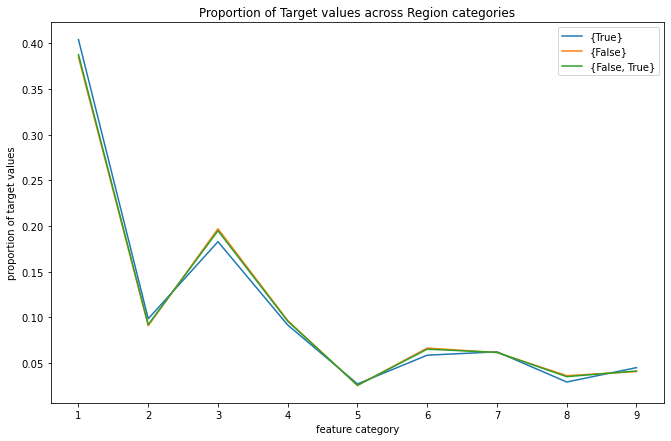

In [25]:
ax = PlotProportionsOfTargetsAcrossFeatCats(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Region'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Region categories')

- Region categories are not uniformly distributed in the dataset.

- Target value proportions do not appreciably differ across region categories either.

- The Region feature by itself does not appear to be strong predictor of Revenue hits by itself.  Though, it could interact with other model features to yield predictive power.     

- We'll likely *not* include this feature in the model to reduce potential of over-fitting.

### Revenue probability by ProductRelated ID

In [26]:
prodRelRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['ProductRelated'].values,
                       True,
                       feature_diversity['ProductRelated'])
prodRelRevProbs

{0: 0.15789473684210525,
 1: 0.02090032154340836,
 2: 0.043010752688172046,
 3: 0.05458515283842795,
 4: 0.04455445544554455,
 5: 0.05235602094240838,
 6: 0.06060606060606061,
 7: 0.08951406649616368,
 8: 0.11351351351351352,
 9: 0.10725552050473186,
 10: 0.15151515151515152,
 11: 0.11688311688311688,
 12: 0.12779552715654952,
 13: 0.15570934256055363,
 14: 0.17131474103585656,
 15: 0.14814814814814814,
 16: 0.14615384615384616,
 17: 0.17699115044247787,
 18: 0.145,
 19: 0.1926605504587156,
 20: 0.17333333333333334,
 21: 0.21105527638190955,
 22: 0.20657276995305165,
 23: 0.18333333333333332,
 24: 0.18229166666666666,
 25: 0.14285714285714285,
 26: 0.1870967741935484,
 27: 0.2033898305084746,
 28: 0.2013888888888889,
 29: 0.2074074074074074,
 30: 0.2605633802816901,
 31: 0.203125,
 32: 0.29411764705882354,
 33: 0.19834710743801653,
 34: 0.20388349514563106,
 35: 0.18811881188118812,
 36: 0.11818181818181818,
 37: 0.22033898305084745,
 38: 0.19101123595505617,
 39: 0.1743119266055046,
 

- Notice that ProductRelated values run continuously in the low end, but are increasingly missing in the high end. 
- Strongly suspect that products with high-valued ProductRelated IDs are purchased less often as hit probabilities are increasingly striated (i.e. taking on values of 1/3, 1/2, 1, and 0) as ProductMethod ID values increase.  
- Need to look at counts across ProductMethod ID values.

In [27]:
prodRelHitCounts = HitCountsGivenFeatCat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['ProductRelated'].values,
                                      True,
                                      feature_diversity['ProductRelated'])

Text(0.5, 1.0, 'Proportion of Target values across ProjectRelated categories')

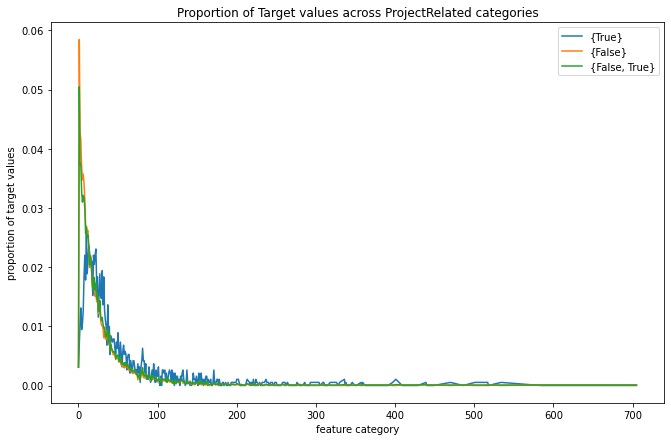

In [28]:
ax = PlotProportionsOfTargetsAcrossFeatCats(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['ProductRelated'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across ProjectRelated categories')

- ProductRelated id categories are *NOT* uniformly distributed in this dataset.

- Shift of `Revenue == True` distribution (blue line) compared to `Revenue == False` (orange line) and total Revenue (green) distributions might provide some predictive power in the overall model.  Perhaps this can be seen in target-specific separation of datapoints along the ProductRelated dimension of a 3D scatter plot. 

Hopefully, there will be enough separation to permit dimensionality reduction via k-means or PCA, etc.  I plan on investigating this after a working model is built.

### Plot correlation scatter of revenue probability over median duration for each category of ProductRelated

In [29]:
def MedianDurationGivenFeatCat(dursVec, featureVec, featValuesSet):
    return {fv: np.median(dursVec[featureVec == fv]) for fv in featValuesSet}

Text(0.5, 1.0, 'ProductRelated revenue probability over average duration scatter')

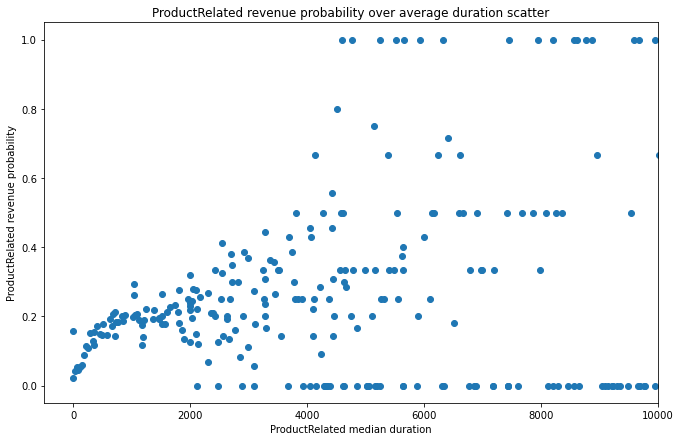

In [30]:
prodRelMedDurs = MedianDurationGivenFeatCat(shopIntent_df['ProductRelated_Duration'].values, 
                                       shopIntent_df['ProductRelated'].values,
                                       feature_diversity['ProductRelated'])
# Plot generation code
fig2, ax2 = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(11,7)
xVec = np.array([prodRelMedDurs[kv] for kv in feature_diversity['ProductRelated']])
yVec = np.array([prodRelRevProbs[kv] for kv in feature_diversity['ProductRelated']])
ax2.scatter(xVec, yVec)
ax2.set_ylabel('ProductRelated revenue probability')
ax2.set_xlabel('ProductRelated median duration')
ax2.set_xlim([-500,1e4])
ax2.set_title('ProductRelated revenue probability over average duration scatter')

- Revenue probability correlates positively with the median duration of shoppers view time of Product related pages.  
- Each datapoint here corresponds with a particular category of the ProductRelated feature. - The correlation loosens with inceasing median duration however. 
- Again, notice the striations in revenue probability due to the sparse sampling of uncommon products.

### Revenue probability by Administrative category

In [32]:
adminRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Administrative'].values, 
                       True,
                       feature_diversity['Administrative'])
adminRevProbs

{0: 0.0891123439667129,
 1: 0.21491875923190545,
 2: 0.18402154398563733,
 3: 0.1901639344262295,
 4: 0.2,
 5: 0.20521739130434782,
 6: 0.2569444444444444,
 7: 0.1952662721893491,
 8: 0.25435540069686413,
 9: 0.27111111111111114,
 10: 0.20915032679738563,
 11: 0.29523809523809524,
 12: 0.2441860465116279,
 13: 0.3392857142857143,
 14: 0.2727272727272727,
 15: 0.21052631578947367,
 16: 0.3333333333333333,
 17: 0.25,
 18: 0.16666666666666666,
 19: 0.16666666666666666,
 20: 0.5,
 21: 0.0,
 22: 0.5,
 23: 0.0,
 24: 0.0,
 26: 1.0,
 27: 0.0}

- Notice that Administrative ID value 25 is missing here.  
- How many different Administrative ID values are there in the population? 
- Do IDs range from  0 through 27, or do they go beyond 27?  

It appears that 25 is missing in this dataset simply because site vistors did not navigate to it.  Could that be the case for possibe IDs greater than 27 as well?  Best course here would be to seek answers from the site developers.

Text(0.5, 1.0, 'Proportion of Target values across Administrative categories')

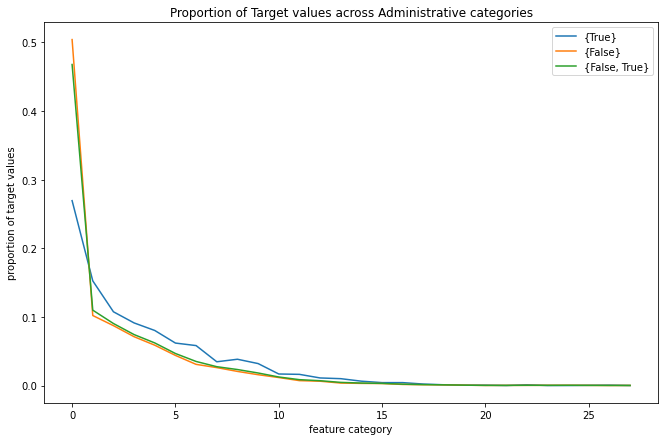

In [31]:
ax = PlotProportionsOfTargetsAcrossFeatCats(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Administrative'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Administrative categories')

- Administrative categories are also *NOT* uniformly distributed in dataset.
- It appears that Admin category values were assigned in order of frequency visited: most frequent getting lowest-valued number.

- As was the case for both `ProductRelated` and `Administrative` variables, there is a shift in proportion for `Revenue == True` cases compared to the other two for low-valued ID numbers of `Informational`.

- The proportions appear to be exponentially distributed.  If possible, consider transforming these values of the feature (likely page ranks) into ones that are more symmetrically distributed in the new space.

Text(0.5, 0, 'Administrative median duration')

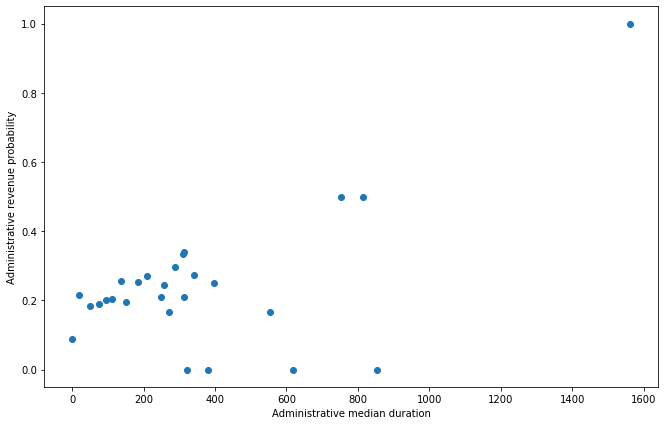

In [33]:
adminMedDurs = MedianDurationGivenFeatCat(shopIntent_df['Administrative_Duration'].values, 
                                       shopIntent_df['Administrative'].values,
                                       feature_diversity['Administrative'])

fig6, ax6 = plt.subplots(nrows=1, ncols=1)
fig6.set_size_inches(11,7)
xVec = np.array([adminMedDurs[kv] for kv in feature_diversity['Administrative']])
yVec = np.array([adminRevProbs[kv] for kv in feature_diversity['Administrative']])
ax6.scatter(xVec, yVec)
ax6.set_ylabel('Administrative revenue probability')
ax6.set_xlabel('Administrative median duration')

- Revenue probability correlates roughly positively with median duration across administrative categories.

### Revenue probability by Informational category

In [34]:
infoRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Informational'].values, 
                       True,
                       feature_diversity['Informational'])
infoRevProbs

{0: 0.13351891947623468,
 1: 0.22670509125840538,
 2: 0.21153846153846154,
 3: 0.24473684210526317,
 4: 0.27927927927927926,
 5: 0.31313131313131315,
 6: 0.21794871794871795,
 7: 0.16666666666666666,
 8: 0.2857142857142857,
 9: 0.4,
 10: 0.2857142857142857,
 11: 0.0,
 12: 0.4,
 13: 0.0,
 14: 0.0,
 16: 0.0,
 24: 0.0}

- Same issue here as with ProductRelated and Administrative features; certain categories appear to be missing for some reason.

Text(0.5, 1.0, 'Proportion of Target values across Informational categories')

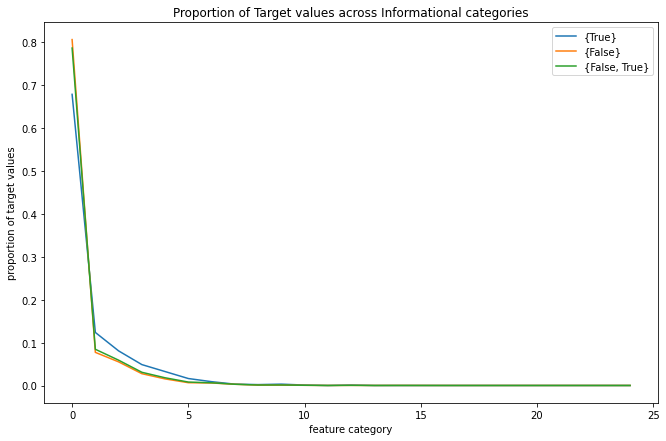

In [35]:
ax = PlotProportionsOfTargetsAcrossFeatCats(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['Informational'].values,
                                      [{True},{False},{True,False}])
ax.set_title('Proportion of Target values across Informational categories')

Text(0.5, 0, 'Info median duration')

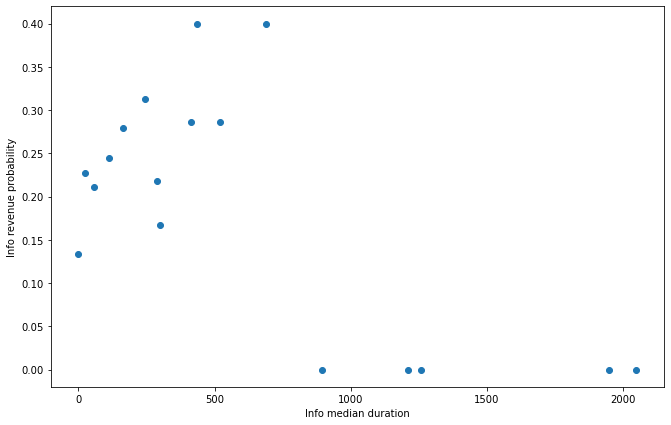

In [36]:
infoMedDurs = MedianDurationGivenFeatCat(shopIntent_df['Informational_Duration'].values, 
                                       shopIntent_df['Informational'].values,
                                       feature_diversity['Informational'])

fig6, ax6 = plt.subplots(nrows=1, ncols=1)
fig6.set_size_inches(11,7)
xVec = np.array([infoMedDurs[kv] for kv in feature_diversity['Informational']])
yVec = np.array([infoRevProbs[kv] for kv in feature_diversity['Informational']])
ax6.scatter(xVec, yVec)
ax6.set_ylabel('Info revenue probability')
ax6.set_xlabel('Info median duration')

- Revenue probability correlates roughly positively with median duration across Informational categories.  
- However, five categories had zero revenue probability despite having the longest median view times.

I'm considering not including `Informational`, and `Informational_Duration` as features of the model. They do not appear to have an easily interpretable relationship with revenue production. 

## Investigate symmetric transformations of categorical features

In [37]:
def expPdfInv(xArray):
    xArray = xArray + np.ones_like(xArray)
    mu_x = np.mean(xArray)
    return -mu_x*np.log(mu_x*xArray)
 

Mean of transformed values: 0.054151595792917215
Median of transformed values: 0.0


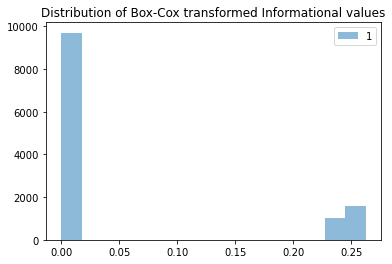

In [38]:
from  scipy.stats import boxcox
import nonparametric_stats as nps

xFormedVals_IN = boxcox(shopIntent_df['Informational'].values + 1 )
#xFormedVals_IN[0]
#plt.hist(xFormedVals_IN, bins=10)
ax = nps.histPlotter(15, xFormedVals_IN[0])
ax.set_title('Distribution of Box-Cox transformed Informational values')

print('Mean of transformed values: {}'.format(np.mean(xFormedVals_IN[0])))
print('Median of transformed values: {}'.format(np.median(xFormedVals_IN[0])))

Mean of transformed values: 0.5334456114980967
Median of transformed values: 0.5828703952621335


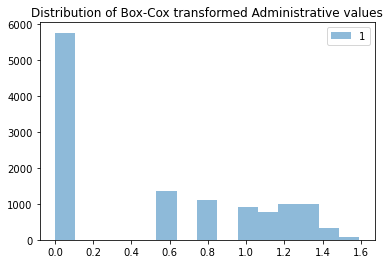

In [39]:
xFormedVals_A = boxcox(shopIntent_df['Administrative'].values + 1 )
ax = nps.histPlotter(15, xFormedVals_A[0])
ax.set_title('Distribution of Box-Cox transformed Administrative values')

print('Mean of transformed values: {}'.format(np.mean(xFormedVals_A[0])))
print('Median of transformed values: {}'.format(np.median(xFormedVals_A[0])))

Mean of transformed values: 2.977979531136002
Median of transformed values: 3.0276554317861155


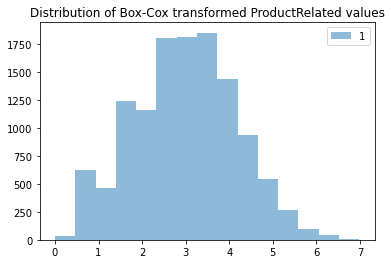

In [40]:
xFormedVals_PR = boxcox(shopIntent_df['ProductRelated'].values + 1 )
ax = nps.histPlotter(15, xFormedVals_PR[0])
ax.set_title('Distribution of Box-Cox transformed ProductRelated values')

print('Mean of transformed values: {}'.format(np.mean(xFormedVals_PR[0])))
print('Median of transformed values: {}'.format(np.median(xFormedVals_PR[0])))

### Generate 3D scatter of Administrative, Informational and ProductRelated numeric categories

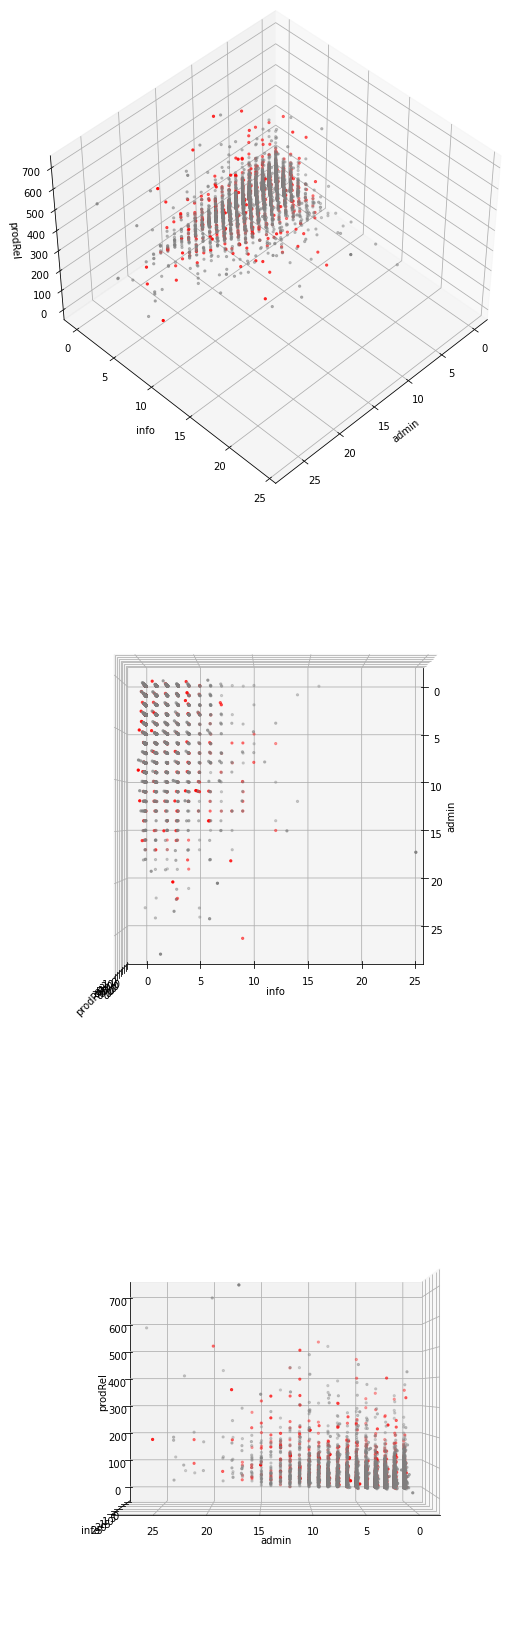

In [41]:
#import mpl_toolkits.mplot3d

revTrueMask = shopIntent_df['Revenue'].values == True
revMaskSet = [revTrueMask, ~revTrueMask]
markerSet = ['.','.']
colorSet = ['red', 'gray']

#fig = plt.figure()
sFig, sAxs = plt.subplots(nrows=3, ncols=1, subplot_kw=dict(projection='3d'))
sFig.set_size_inches(10,30)
#sAxs[0,0] = scatterFig.add_subplot(2,2,1, projection="3d")
viewAngles = ((45, 45), (90, 0), (0, 90))
for j in np.arange(0,3):
    for i in [1, 0]:
        
        sAxs[j].scatter(shopIntent_df['Administrative'].iloc[revMaskSet[i]].values,
               shopIntent_df['Informational'].iloc[revMaskSet[i]].values,
               shopIntent_df['ProductRelated'].iloc[revMaskSet[i]].values, 
               marker=markerSet[i], color=colorSet[i])

    sAxs[j].set_xlabel('admin')
    sAxs[j].set_ylabel('info')
    sAxs[j].set_zlabel('prodRel')

    # rotate the axes and update
    #ax.view_init(45, 45)
    sAxs[j].view_init(*viewAngles[j])
    plt.draw()

- Red points are the `Revenue == True` set, gray are `Revenue == False`
- No distinct clusters immediately visible; just one corner-squished blob interleaved with another.  
- Will try applying a symmetry transform to each feature then re-plotting (e.g. z-score, Box-Cox), but edge-peaks will likely prove problematic.

### Examine response class centroids in 3-space

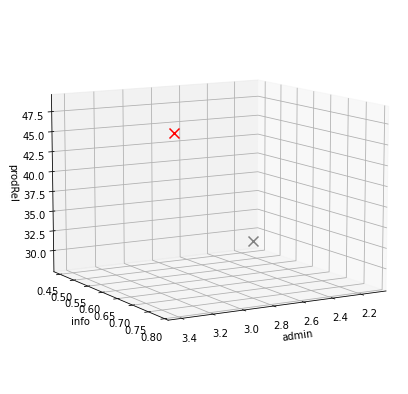

In [42]:
markerSet = ['x','x']
markerSize = 100
colorSet = ['red', 'gray']

fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot(projection="3d")

for i in [1, 0]:
    
    ax.scatter(np.mean(shopIntent_df['Administrative'].iloc[revMaskSet[i]].values),
               np.mean(shopIntent_df['Informational'].iloc[revMaskSet[i]].values),
               np.mean(shopIntent_df['ProductRelated'].iloc[revMaskSet[i]].values), 
               marker=markerSet[i], s=markerSize, color=colorSet[i])
    
ax.set_xlabel('admin')
ax.set_ylabel('info')
ax.set_zlabel('prodRel')

# rotate the axes and update
ax.view_init(10, 60)
plt.draw()

Centroids of the `Revenue == True` and `Revenue == False` clouds do seem displaced; at least along the `ProductRelated` and `Adminsitrative` axes.

Take Aways:
- For the three features `Administrative`, `Informational` and `ProductRelated`, the data appear highly-skewed--not at all normally, or uniformly distributed.
- Cloud is most heavily concentrated near the origin (0,0,0) and tails off with sparse, high-valued outliers along each of the three dimensions. 
- Data from classes `Revenue == True` are interspersed with `Revenue == False` datapoints among the three features. 

Transformations for `Administrative` and `Informational` features


### Generate 3D plots of Box-Cox-transformed features

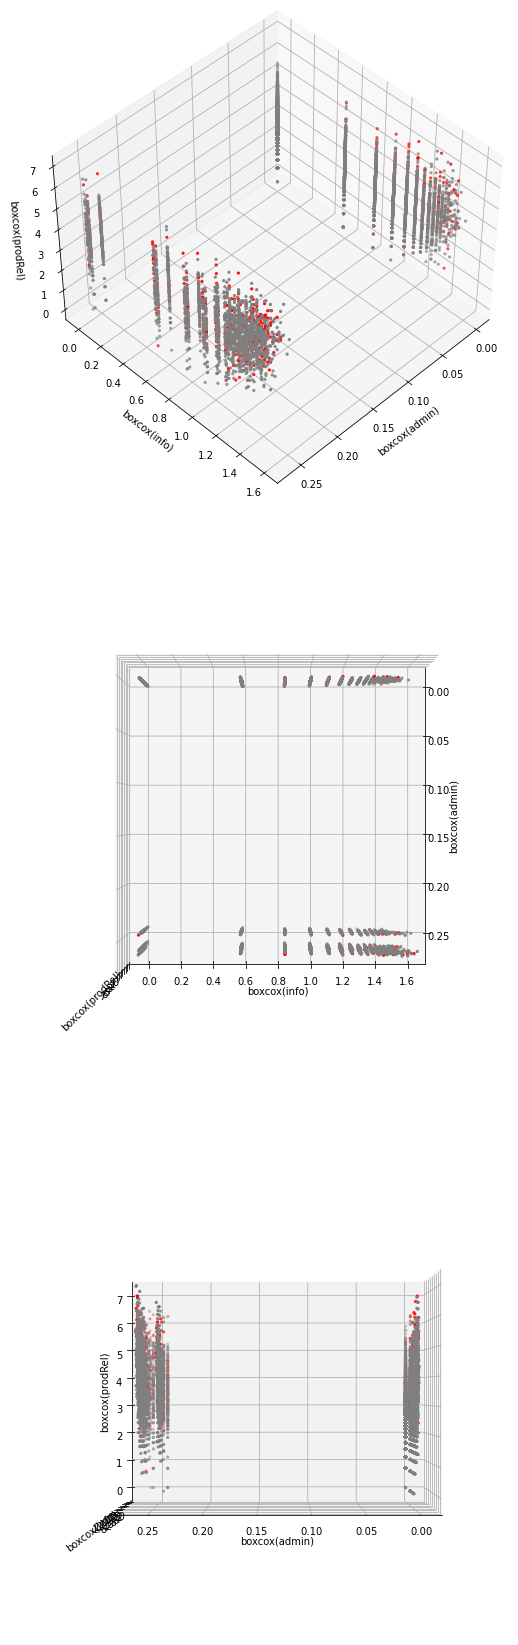

In [43]:
#import mpl_toolkits.mplot3d

revTrueMask = shopIntent_df['Revenue'].values == True
revMaskSet = [revTrueMask, ~revTrueMask]
markerSet = ['.','.']
colorSet = ['red', 'gray']

#fig = plt.figure()
sFig, sAxs = plt.subplots(nrows=3, ncols=1, subplot_kw=dict(projection='3d'))
sFig.set_size_inches(10,30)
#sAxs[0,0] = scatterFig.add_subplot(2,2,1, projection="3d")
viewAngles = ((45, 45), (90, 0), (0, 90))
for j in np.arange(0,3):
    for i in [1, 0]:

        # Box-Cox transformed points
        sAxs[j].scatter(xFormedVals_IN[0][revMaskSet[i]],
               xFormedVals_A[0][revMaskSet[i]],
               xFormedVals_PR[0][revMaskSet[i]], 
               marker=markerSet[i], color=colorSet[i])
        
    sAxs[j].set_xlabel('boxcox(admin)')
    sAxs[j].set_ylabel('boxcox(info)')
    sAxs[j].set_zlabel('boxcox(prodRel)')

    # rotate the axes and update
    #ax.view_init(45, 45)
    sAxs[j].view_init(*viewAngles[j])
    plt.draw()

- Transformed distributions are greatly striated along `Informational` and `Administrative` features due to their edge-peaks
- `Revenue == True` and `Revenue == False` subsets are still highly interleaved

### Apply a softmax transformation to each of the three features and plot

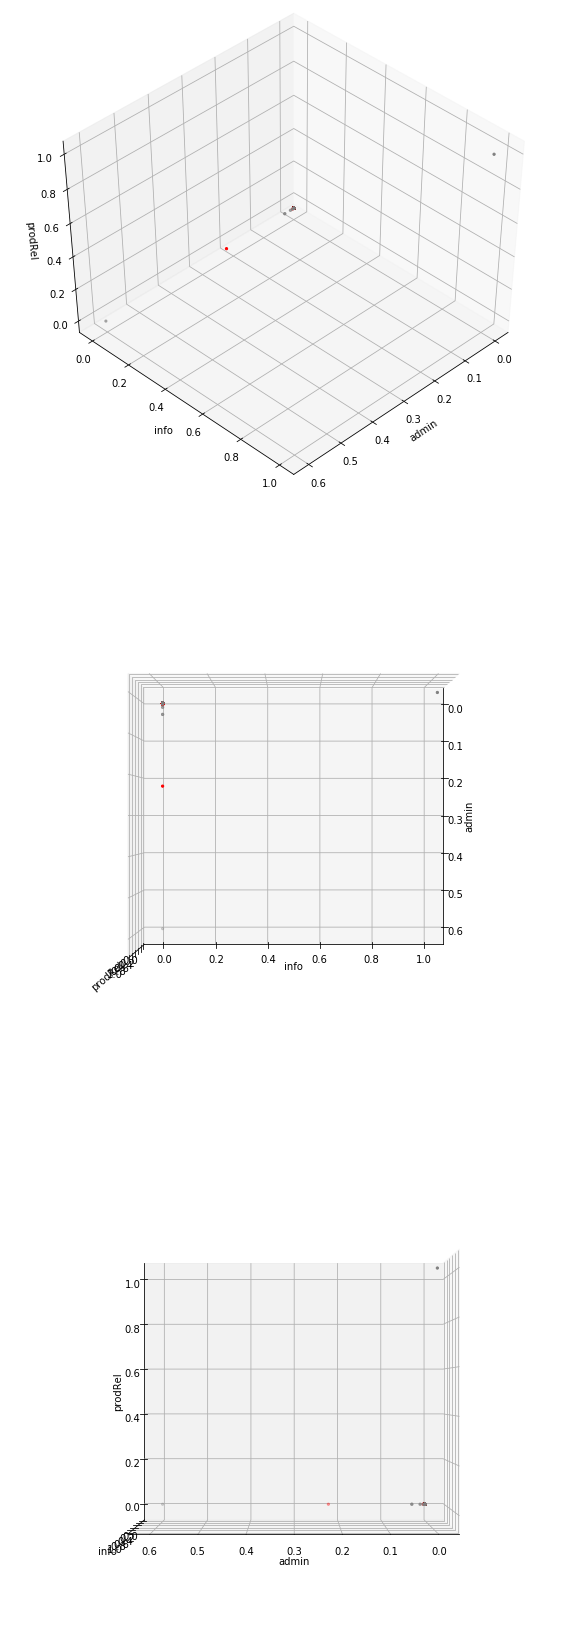

In [58]:
# Import softmax package
import scipy.special as sp
admin_sm = sp.softmax(shopIntent_df['Administrative'].values)
info_sm = sp.softmax(shopIntent_df['Informational'].values)
prodRel_sm = sp.softmax(shopIntent_df['ProductRelated'].values)

sFig, sAxs = plt.subplots(nrows=3, ncols=1, subplot_kw=dict(projection='3d'))
sFig.set_size_inches(10,30)
#sAxs[0,0] = scatterFig.add_subplot(2,2,1, projection="3d")
viewAngles = ((45, 45), (90, 0), (0, 90))
for j in np.arange(0,3):
    for i in [1, 0]:
    
        sAxs[j].scatter(admin_sm[revMaskSet[i]], info_sm[revMaskSet[i]], 
                        prodRel_sm[revMaskSet[i]], 
                        marker=markerSet[i], color=colorSet[i])
    
    sAxs[j].set_xlabel('admin')
    sAxs[j].set_ylabel('info')
    sAxs[j].set_zlabel('prodRel')

    # rotate the axes and update
    #ax.view_init(45, 45)
    sAxs[j].view_init(*viewAngles[j])
    plt.draw()

### Investigate revenue probability by month

In [44]:
monthRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Month'].values, 
                       True,
                       feature_diversity['Month'])
monthRevProbs

{'Aug': 0.17551963048498845,
 'Dec': 0.1250723798494499,
 'Feb': 0.016304347826086956,
 'Jul': 0.1527777777777778,
 'June': 0.10069444444444445,
 'Mar': 0.10068169900367069,
 'May': 0.10850178359096314,
 'Nov': 0.25350233488992663,
 'Oct': 0.20947176684881602,
 'Sep': 0.19196428571428573}

- Months of January and April are missing. Is this because none of the visitors purchased items during these months? 
- There are no January or April events in the dataset.  Perhaps the site was not offering the items on those months.

Convert months to numerical values and plot probabilities in ordered time sequence to see if there are seasonal trends

Text(0, 0.5, 'revenue probability')

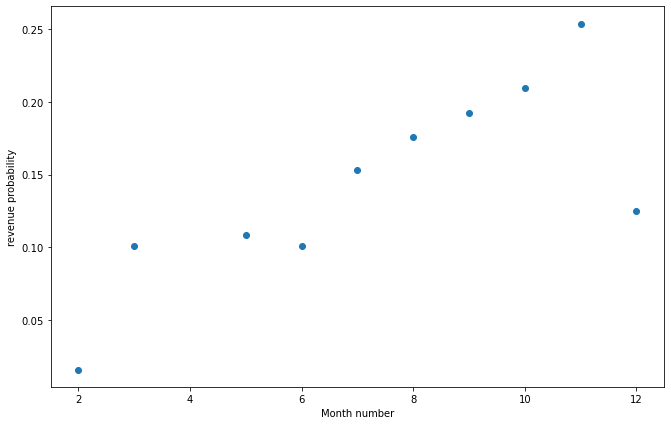

In [45]:
monthConv = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

xVec = np.array([monthConv[k] for k in monthRevProbs.keys()])
yVec = np.array([monthRevProbs[k] for k in monthRevProbs.keys()])

fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
ax.scatter(xVec, yVec, marker='o')
ax.set_xlabel('Month number')
ax.set_ylabel('revenue probability')

- July through November showed monotonic increase in purchases.

### Revenue probability by SpecialDay categories

In [46]:
feature_diversity['SpecialDay']

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [47]:
spDayRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['SpecialDay'].values, 
                       True,
                       feature_diversity['SpecialDay'])
spDayRevProbs

{0.0: 0.16526762343171766,
 0.2: 0.07865168539325842,
 0.4: 0.053497942386831275,
 0.6: 0.08262108262108261,
 0.8: 0.033846153846153845,
 1.0: 0.06493506493506493}

- Increase in revenue on special days compared to days that preceded them. 

### Revenue probability by Weekend categories

In [48]:
weekendRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Weekend'].values, 
                       True,
                       feature_diversity['Weekend'])
weekendRevProbs

{False: 0.1489114352145424, True: 0.17398884239888424}

- Modest increase in revenue probability during weekends compared to weekdays.

In [49]:
weekendConv = {True: 1, False: 0}
weekendConv[True]

1

### Revenue probability by TrafficType categories

In [50]:
trafTypeRevProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['TrafficType'].values, 
                       True,
                       feature_diversity['TrafficType'])
trafTypeRevProbs

{1: 0.10689514483884129,
 2: 0.21645796064400716,
 3: 0.08771929824561403,
 4: 0.15434985968194576,
 5: 0.2153846153846154,
 6: 0.11936936936936937,
 7: 0.3,
 8: 0.27696793002915454,
 9: 0.09523809523809523,
 10: 0.2,
 11: 0.1902834008097166,
 12: 0.0,
 13: 0.058265582655826556,
 14: 0.15384615384615385,
 15: 0.0,
 16: 0.3333333333333333,
 17: 0.0,
 18: 0.0,
 19: 0.058823529411764705,
 20: 0.25252525252525254}

- Traffic types 16, 7 and 8 were most likely to produce revenue.

### Revenue probability by Visitor categories

In [51]:
visitorProbs = RevProbGivenFeatCat(shopIntent_df['Revenue'].values, 
                       shopIntent_df['VisitorType'].values, 
                       True,
                       feature_diversity['VisitorType'])
visitorProbs

{'New_Visitor': 0.24911452184179456,
 'Other': 0.18823529411764706,
 'Returning_Visitor': 0.1393232868922377}

- New visitors were the most likely of the three types to make a purchase.

In [52]:
visitorConv = {'New_Visitor':  0, 'Returning_Visitor': 1, 'Other': 2}
visitorConv['Returning_Visitor']

1

### Compare BounceRates

In [53]:
feature_diversity['BounceRates'].shape

(1872,)

Text(0.5, 1.0, 'Bounce rates by Revenue value box-plot')

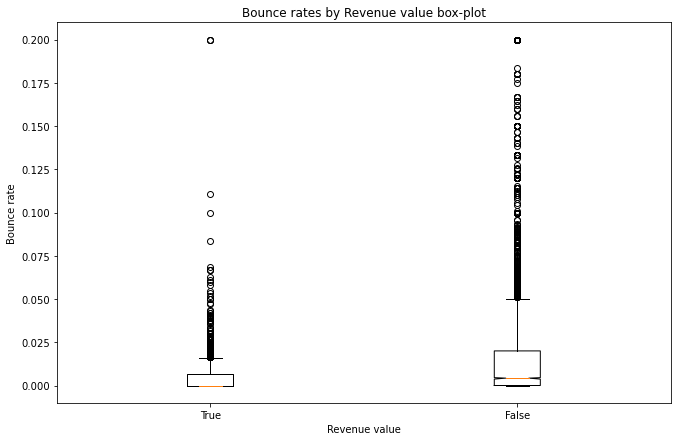

In [54]:
fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
xlabels = ['True', 'False']
ax.boxplot([shopIntent_df['BounceRates'].iloc[revMaskSet[i]].values for i in [0,1]], 
           notch=True, bootstrap=1000, labels=xlabels)
ax.set_xlabel('Revenue value')
ax.set_ylabel('Bounce rate')
ax.set_title('Bounce rates by Revenue value box-plot')

- Bounce rate distributions are highly skewed for both target vales
- Median bounce rate was significantly greater for non-revenue-producing transactions.
- Bounce rates of non-buys comprised a broader distribution than bounce rates of purchasers.

Box-plot key:
- Red lines: distrbution medians
- Notches: 95% confidence boundaries of medians determined by R=1000 bootstrap
- Vertical box bounds extend from first quantile (bottom) to third quantile (top) of distribution
- Whiskers extend beyond box by 1.5 times the interquantile range
- Points are outliers; datapoints that lie outside whiskers

### Compare ExitRates

Text(0.5, 1.0, 'Exit rates by Revenue value box-plot')

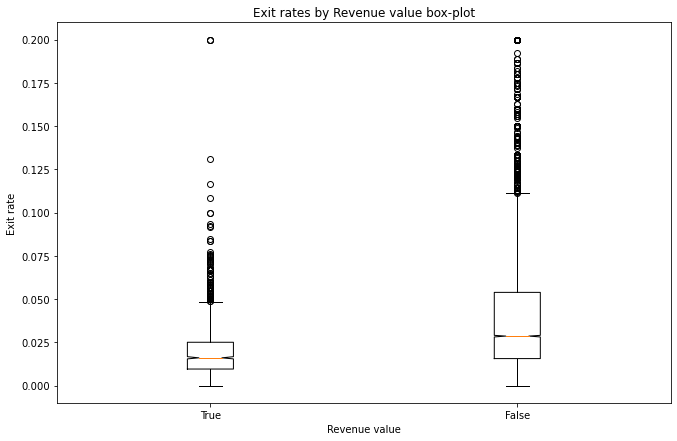

In [55]:
fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
xlabels = ['True', 'False']
ax.boxplot([shopIntent_df['ExitRates'].iloc[revMaskSet[i]].values for i in [0,1]], 
           notch=True, bootstrap=1000, labels=xlabels)
ax.set_xlabel('Revenue value')
ax.set_ylabel('Exit rate')
ax.set_title('Exit rates by Revenue value box-plot')

- Distributions of `ExitRates` are both greatly skewed for both target values
- Revenue producing transactions had significanly reduced median exit rates.

### Compare PageValues

Text(0.5, 1.0, 'Page values by Revenue value box-plot')

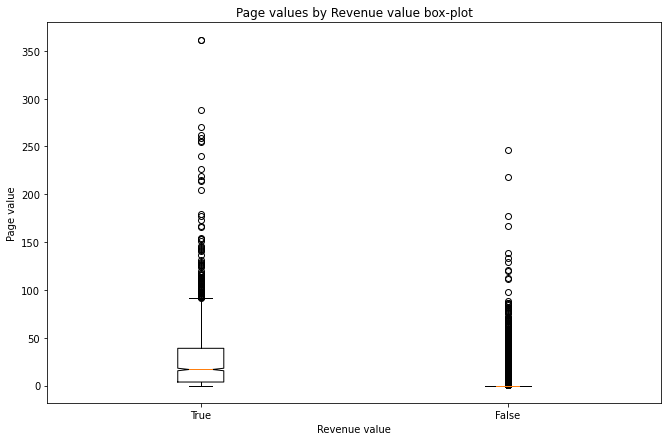

In [56]:
fig = plt.figure()
fig.set_size_inches(11,7)
ax = fig.add_subplot()
xlabels = ['True', 'False']
ax.boxplot([shopIntent_df['PageValues'].iloc[revMaskSet[i]].values for i in [0,1]], 
           notch=True, bootstrap=1000, labels=xlabels)
ax.set_xlabel('Revenue value')
ax.set_ylabel('Page value')
ax.set_title('Page values by Revenue value box-plot')

- Distributions of page values are greatly skewed for both revenue producing and non-revenue-producing transactions
- Revenue producing transactions had significantly greater median page values

## Data Exploration summary

- Distributions of all categorical features are highly non-uniform and greatly skewed toward one or few categories
- Attempts to transform skewed categorical features to be symmetrically distributed were unsuccessful
- Distributions of all continuous features are non-normal and highly skewed toward low values
- All categorical features except perhaps `Region` and `Informational` have varied revenue probabilities across categories
- Distributions of continuous-valued features all substantially differed, in terms of both median and variance, between `Revenue == True` versus `Revenue == False` sub-groupings

## Model Choice

- Model must be able to handle features whose distributions are highly skewed 
    - --> Support Vector Machine Classifiers make no assumptions about shape of their input distributions
        - Can handle non-linearly separable response classes though kernel mapping
        - Process high-dimensional data
        - Do not use sample means --> less affected by data outliers
        - Use only a subset of data points to calculate boundary margins
        - Can be trained on imbalanced datasets            

## Data imbalance strategy

- Need to account for large 5-fold imbalance between `Revenue == True` records and `Revenue == False` records in the dataset 
    - --> Ensemble methods (bagging, boosting) aggregate predictions from several or many classifiers to improve performance of single base classifiers
        - reduce variance 
        - overcome overfitting
        - reduce influence of noisy in data
    - --> Random majority undersampling or random minority oversampling
        - suffer from bias and overfitting respectively
    - --> Cluster-based, Synthetic Minority Over-sampling Technique (SMOTE)
        - distinct clusters required; not immediately apparent in preliminary inspection of this dataset

# Value conversion 

Planning on starting with an SVM-based model that can only take numerically-valued features.  Accordingly, features that have text lables as values need to be converted to have numeric category labels.  Conversion dicts for each were defined above.

In [57]:
monthConv = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

weekendConv = {True: 1, False: 0}

visitorConv = {'New_Visitor':  0, 'Returning_Visitor': 1, 'Other': 2}

In [59]:
# Convert columns using conversion dicts
monthNumArray = np.array([monthConv[ml] for ml in shopIntent_df['Month'].values])
weekendNumArray = np.array([weekendConv[wl] for wl in shopIntent_df['Weekend'].values])
visitorNumArray = np.array([visitorConv[vl] for vl in shopIntent_df['VisitorType'].values])
revenueNumArray = shopIntent_df['Revenue'].values.astype(int)

In [60]:
# Insert numerically-converted columns into dataframe
shopIntent_df['nMonth'] = monthNumArray
shopIntent_df['nWeekend'] = weekendNumArray
shopIntent_df['nVisitorType'] = visitorNumArray
shopIntent_df['nRevenue'] = revenueNumArray

# Model setup

**Overview:** Here we will train and evaluate performance of a single Support Vector Machine classifier.  Provided it shows descent accuracy, single SVCs will be used as base classifiers in a bootstrapped aggregated ensemble to enhance generalizability and performance in the next section.

### Import additional modules

In [61]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler

### Specify features to include and response class

In [62]:
CompleteFeatureSpace = set(shopIntent_df.columns)
type(CompleteFeatureSpace)

set

In [64]:
ModelFeatureSet = CompleteFeatureSpace - set([
    'Revenue', 'nRevenue', 'Month', 'VisitorType', 'Weekend'
])
ModelTarget = 'nRevenue'

ModelFeatureSet

{'Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'OperatingSystems',
 'PageValues',
 'ProductRelated',
 'ProductRelated_Duration',
 'Region',
 'SpecialDay',
 'TrafficType',
 'nMonth',
 'nVisitorType',
 'nWeekend'}

- Turns out that features `Region` and `Informational` do slightly enhance model prediction performance.  They are included here.

In [65]:
# Generate lists of indices for response class sets (i.e. Revenue == True, Revenue == False)
indices =  np.arange(0, shopIntent_df.shape[0])
targTrueIndices = indices[shopIntent_df[ModelTarget] == 1]
targFalseIndices = indices[shopIntent_df[ModelTarget] == 0]
print('Number of Revenue = True records: {}'.format(targTrueIndices.shape[0]))
print('Number of Revenue = False records: {}'.format(targFalseIndices.shape[0]))

Number of Revenue = True records: 1908
Number of Revenue = False records: 10422


### Partition data into training and testing subsets

In [66]:
# Specify proportion (0.0, 1.0) of selected records to be 
# used to train model 
trainProp = 0.7

# Generate mask to randomly select records from the collection
# of non-revenue producing transactions
selTargFalseInds = np.random.choice(targFalseIndices, 
                                    #size=targTrueIndices.shape[0],
                                    size=targFalseIndices.shape[0],
                                    replace=False)
# Combine revenue and and non-revenue masks into single 
# composite list, count the total number of elements, then 
# shuffle the list.
combinedIndices = np.concatenate((targTrueIndices, selTargFalseInds), axis=0)
nSamples = combinedIndices.shape[0]
np.random.shuffle(combinedIndices)

# Split list into training and testing sets
splitIndex = int(np.ceil(trainProp*nSamples))
trainSelect = np.arange(0, splitIndex)
testSelect = np.arange(splitIndex, nSamples)
trainSetIndices = combinedIndices[trainSelect]
#testSetIndices = combinedIndices[testSelect]
testSetIndices = np.array([i for i in indices if i not in trainSetIndices]) 

Previously, only a subset of available records were used for cross-validation. Above, the  last line includes all available records in the testing set.

In [67]:
# Verifying that training and testing sets do not intersect
np.sum([(ti in testSetIndices) for ti in trainSetIndices])

0

In [68]:
# Checking size of training set
shopIntent_df[ModelFeatureSet].iloc[trainSetIndices].values.shape

(8631, 17)

In [69]:
# Checking size of testing set
shopIntent_df[ModelFeatureSet].iloc[testSetIndices].values.shape

(3699, 17)

### Apply z-score transform to columns in dataset

The radial basis function kernel of the SVM assumes that feature distributions are zero-centered and of roughly equal variance.  Below a z-scoring transform is applied to the training and testing data subsets using common fit parameters (training set mean and training set standard deviation).

In [70]:
stdsc = StandardScaler()
# fit z-scoring transform to training set and transform it  
X_train_std = stdsc.fit_transform(shopIntent_df[ModelFeatureSet].iloc[trainSetIndices])
# use fit parameters from training set to transform test set
X_test_std = stdsc.transform(shopIntent_df[ModelFeatureSet].iloc[testSetIndices])

#  Keep target values as elements of {0, 1}
y_train = shopIntent_df[ModelTarget].iloc[trainSetIndices]
y_test = shopIntent_df[ModelTarget].iloc[testSetIndices]

In [71]:
print('Verifying z-score transform. mean: {}, std.: {}'.format(
    np.mean(X_train_std[:,0]), np.std(X_train_std[:,0])))

Verifying z-score transform. mean: -6.133175045084865e-17, std.: 1.0


# Train and test single model

## Initialize and train base SVM model

In [73]:
shopIntent_mod = svm.SVC(kernel='rbf', gamma='scale', C=2.0, 
                         class_weight={1: 1.0, 0: 0.35}, probability=True)
#shopIntent_mod.fit(shopIntent_df[ModelFeatureSet].iloc[trainSetIndices], 
#               shopIntent_df[ModelTarget].iloc[trainSetIndices])
shopIntent_mod.fit(X_train_std, y_train)

SVC(C=2.0, class_weight={0: 0.35, 1: 1.0}, probability=True)

## Run model on test set and compute probability scores

In [74]:
# Generate predictions and prediction probabilities using test set 
preds_svc = shopIntent_mod.predict(X_test_std)
pred_probas_svc = shopIntent_mod.predict_proba(X_test_std)
preds_svc
#pred_probas

array([0, 0, 0, ..., 0, 0, 0])

## Run metrics

In [75]:
# Count total corrects
np.sum(preds_svc == y_test)

3231

In [76]:
# Compile confusion matrix
mt.confusion_matrix(y_test, preds_svc, labels=[1,0])

array([[ 398,  202],
       [ 266, 2833]])

### Verify proportions of each class in test output

In [77]:
# Calculate precision
mt.precision_score(y_test, preds_svc, labels=[1,0])

0.5993975903614458

In [78]:
# Calculate recall
mt.recall_score(y_test, preds_svc, labels=[1,0])

0.6633333333333333

In [80]:
# Calculate accuracy
mt.accuracy_score(y_test, preds_svc)

0.8734793187347932

## Compute and plot Precision-Recall ROC curve

(-0.05, 1.05)

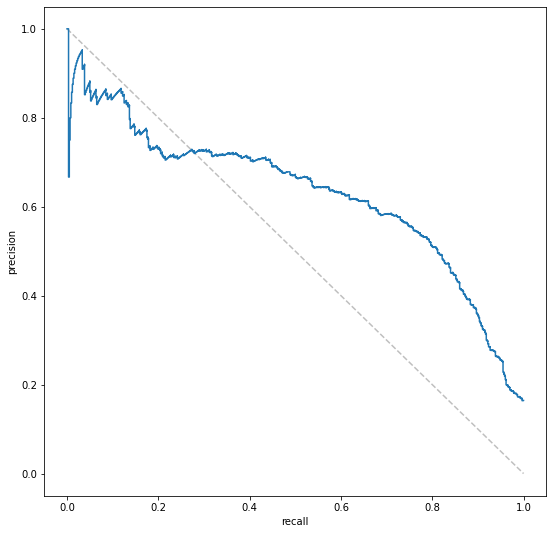

In [81]:
precCrv_svc, recCrv_svc, thlds_svc = mt.precision_recall_curve(y_test, pred_probas_svc[:,1], 
                                                   pos_label=1)
fig4, ax4 = plt.subplots(nrows=1, ncols=1)
fig4.set_size_inches(9, 9)
ax4.plot([0., 1.],[1., 0], '--', color='gray', alpha=0.5)
ax4.step(recCrv_svc, precCrv_svc)
ax4.set_xlabel('recall')
ax4.set_ylabel('precision')
ax4.set_ylim([-0.05, 1.05])
ax4.set_xlim([-0.05, 1.05])

In [83]:
mt.auc(recCrv_svc, precCrv_svc)

0.6288097141461274

In [82]:
mt.roc_auc_score(y_test, preds_svc)

0.7887495966440787

# Employ ensemble learning to enhance robustness

The model above was originally trained using all `Revenue == True` examples in the training set but only a small subset (equal to the number of `Revenue == True` records in the training set) of randomly selected examples from the `Revenue == False` collection of training examples.  The model was naive with respect to a great many non-purchase examples that remain in the (complete) training set and did not well predict revenue producing events in the testing set of novel examples.


Originally, I employed a manual bagging procedure that randomly drew (with replacement) N records from the `Revenue == True` set (of N records) and N records from the `Revenue == False` set (of ~ 5\*N records) to train each SVM model in the ensemble.  Once trained, ensemble predictions on test data were decided by "majority vote" of predictions from the individual model constituents. I had reservations about the approach before getting started:

**Concern:** In the bagging scheme outlined above, one can expect a given `Revenue == True` record to be present about 5 times more frequently in training samples than a given `Revenue == False` record.  Ensemble bias toward the `Revenue == True` may result in over-fitting of this class compared to the `Revenue == False` class.

Much testing showed, as expected, that the above concern was warrented. Consequently, I changed the proportion of `Revenue == False`records in the training set back to that of the complete dataset and adjusted the weighting of these samples in the SVM model to about one-fifth that of the `Revenue == True` records to compensate. This altered-weighting appoach improved single-model SVM prediction performance metrics compared to the earlier (equal-proportions) approach.  Regularization strength hyperparameter `C` was also tuned via adjustments of ~0.5.

### Partition data into training and testing sets

In [84]:
# Specify proportion, within domain (0.0, 1.0), of selected records to be 
# used to train model 
trainProp = 0.7

# Randomly select trainProp proportion of revenue = true records
# and the same proportion of revenue = false records to assemble 
# the ensemble training set. Sample without replacement here.
selTargTrueSize = int(np.round(trainProp*targTrueIndices.shape[0]))
selTargFalseSize = int(np.round(trainProp*targFalseIndices.shape[0]))
selTargTrueIndices = np.random.choice(targTrueIndices, size=selTargTrueSize, 
                                      replace=False)
selTargFalseIndices = np.random.choice(targFalseIndices, size=selTargFalseSize,
                                       replace=False)

# Build complete list of training set indices
trainingSetIndices = np.concatenate((selTargTrueIndices, selTargFalseIndices), axis=0)
trainingSetSize = trainingSetIndices.shape[0]
np.random.shuffle(trainingSetIndices)

# Build complete list of testing set indices
testingSetIndices = np.array([i for i in indices if i not in trainingSetIndices])
np.random.shuffle(testingSetIndices)
testingSetSize = testingSetIndices.shape[0]

np.intersect1d(trainingSetIndices, testingSetIndices).shape

(0,)

### Verify data partitioning

In [92]:
np.sum([(ti in selectIndices) for ti in testingSetIndices])

0

In [93]:
np.sum([(ti in selTargTrueIndices) for ti in targTrueIndices])/targTrueIndices.shape[0]

0.70020964360587

In [94]:
np.sum([(ti in selTargFalseIndices) for ti in targFalseIndices])/targFalseIndices.shape[0]

0.6999616196507388

In [95]:
np.sum([(ti in selTargTrueIndices) for ti in selTargFalseIndices])

0

In [96]:
np.sum([(ti in selTargTrueIndices) for ti in testingSetIndices])

0

In [97]:
np.sum([(ti in selTargFalseIndices) for ti in testingSetIndices])

0

### Fit a z-score transform to the training set

In [85]:
stdsc_ens = StandardScaler()
stdsc_ens

StandardScaler()

In [86]:
# fit z-scoring transform to training set
stdsc_ens.fit(shopIntent_df[ModelFeatureSet].iloc[trainingSetIndices])
stdsc.scale_

array([4.88171097e-02, 1.26482471e+00, 1.78990960e+02, 3.34265927e+00,
       1.40249374e+02, 1.96009191e-01, 8.91289756e-01, 4.04167003e+00,
       4.51468890e+01, 4.23615499e-01, 1.72565606e+00, 3.52805759e-01,
       1.84385937e+01, 2.39256120e+00, 1.95472798e+03, 4.87437301e-02,
       3.39161251e+00])

In [87]:
# Just checking that the scikit-learn's standardizing scaler 
# transform object works as I think it does...
np.std(stdsc_ens.transform(shopIntent_df[ModelFeatureSet].iloc[trainingSetIndices])[:,5])

0.9999999999999999

In [88]:
np.std(stdsc_ens.transform(shopIntent_df[ModelFeatureSet].iloc[testingSetIndices])[:,5])

0.9661897497209945

## Fit ensemble of  models

In [89]:
nModels = 5
shopIntent_ens = [svm.SVC(kernel='rbf', C=2.0, gamma='scale', 
                          class_weight={1: 1.0, 0: 0.35},
                          probability=True) 
                  for ei in np.arange(0, nModels)]

In [90]:
shopIntent_ens

[SVC(C=2.0, class_weight={0: 0.35, 1: 1.0}, probability=True),
 SVC(C=2.0, class_weight={0: 0.35, 1: 1.0}, probability=True),
 SVC(C=2.0, class_weight={0: 0.35, 1: 1.0}, probability=True),
 SVC(C=2.0, class_weight={0: 0.35, 1: 1.0}, probability=True),
 SVC(C=2.0, class_weight={0: 0.35, 1: 1.0}, probability=True)]

In [91]:
# fit each model of the ensemble a different bagged-sample
# from the training set
import time
ts_start = time.time()
for ei in np.arange(0, nModels):
    
    randChoiceTrue = np.random.choice(selTargTrueIndices, 
                                      size=selTargTrueSize, 
                                      replace=True)
    randChoiceFalse = np.random.choice(selTargFalseIndices, 
                                      #size=selTargTrueSize, # Note same size sample as above
                                      size=selTargFalseSize, 
                                      replace=True)
    selectIndices = np.concatenate((randChoiceTrue, randChoiceFalse))
    np.random.shuffle(selectIndices)
    
    shopIntent_ens[ei].fit(
        stdsc_ens.transform(shopIntent_df[ModelFeatureSet].iloc[selectIndices]), 
                            shopIntent_df[ModelTarget].iloc[selectIndices])
    
    #shopIntent_ens[ei].fit(X_train_std, y_train)
ts_stop = time.time()
print('Training time took {:.2f} seconds'.format(ts_stop - ts_start))

Training time took 60.24 seconds


## Inspect Precision-Response curve of an individual model

(-0.05, 1.05)

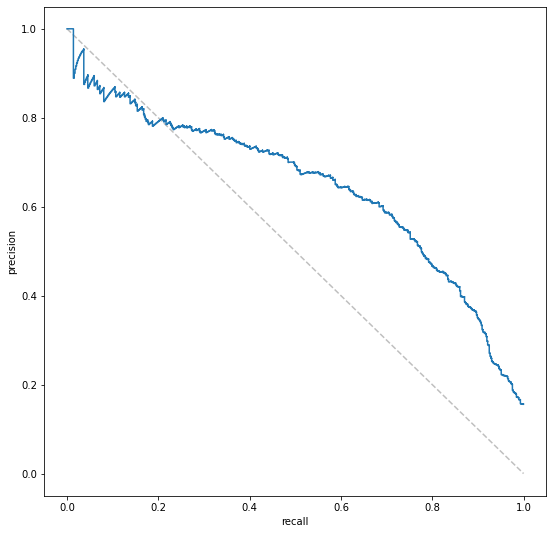

In [98]:
modSelect = 0
preds_svc2 = shopIntent_ens[modSelect].predict(
    stdsc_ens.transform(shopIntent_df[ModelFeatureSet].iloc[testingSetIndices]))
pred_probas_svc2 = shopIntent_ens[modSelect].predict_proba(
    stdsc_ens.transform(shopIntent_df[ModelFeatureSet].iloc[testingSetIndices]))

precCrv_svc2, recCrv_svc2, thlds_svc2 = mt.precision_recall_curve(
    shopIntent_df[ModelTarget].iloc[testingSetIndices].values, 
    pred_probas_svc2[:,1], pos_label=1)

fig4, ax4 = plt.subplots(nrows=1, ncols=1)
fig4.set_size_inches(9, 9)
ax4.plot([0., 1.],[1., 0], '--', color='gray', alpha=0.5)
ax4.step(recCrv_svc2, precCrv_svc2)
ax4.set_xlabel('recall')
ax4.set_ylabel('precision')
ax4.set_ylim([-0.05, 1.05])
ax4.set_xlim([-0.05, 1.05])

In [99]:
mt.confusion_matrix(preds_svc2, 
                    shopIntent_df[ModelTarget].iloc[testingSetIndices], 
                    labels=[1,0])

array([[ 381,  242],
       [ 191, 2885]])

In [101]:
mt.roc_auc_score(shopIntent_df[ModelTarget].iloc[testingSetIndices], preds_svc2)

0.7943467229923897

## Ensemble majority determines final prediction 

In [102]:
# NOTE: Output need to match that of .predict_probas for the Precision-Recall 
# curve generating routine
decThresh = 0.5
ts_start = time.time()
testSamples = stdsc_ens.transform(
    shopIntent_df[ModelFeatureSet].iloc[testingSetIndices].values)
modIndices = np.arange(0, nModels)
pForTrue = np.array([sum([shopIntent_ens[mi].predict(np.reshape(ts,(1,-1))) 
                          for mi in modIndices])/nModels 
                     for ts in testSamples])
ensPredProbs = np.array([pForTrue[:,0], 1 - pForTrue[:,0]]).transpose()
ensPreds = (ensPredProbs[:,0] >= decThresh).astype(int)
#ensPredProbs
#ensPreds
ts_stop = time.time()
print('Prediction time took {:.2f} seconds'.format(ts_stop - ts_start))

Prediction time took 5.91 seconds


(-0.05, 1.05)

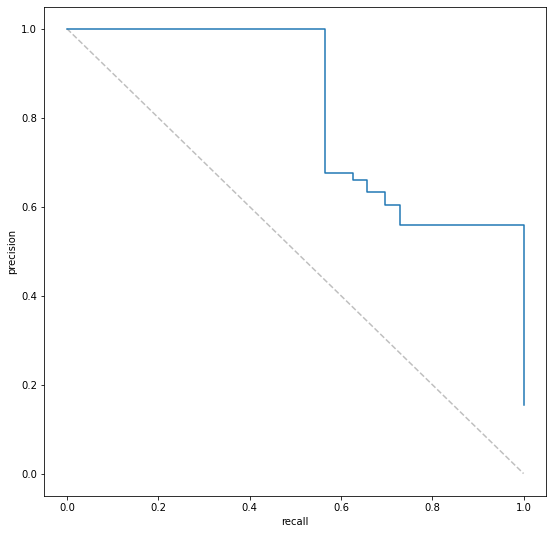

In [103]:
precCrv_ens, recCrv_ens, thlds_ens = mt.precision_recall_curve(shopIntent_df[ModelTarget].iloc[testingSetIndices], 
                                                    ensPredProbs[:,0], pos_label=1)
fig4, ax4 = plt.subplots(nrows=1, ncols=1)
fig4.set_size_inches(9, 9)
ax4.plot([0., 1.],[1., 0], '--', color='gray', alpha=0.5)
ax4.step(recCrv_ens, precCrv_ens)
ax4.set_xlabel('recall')
ax4.set_ylabel('precision')
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])

In [106]:
mt.roc_auc_score(shopIntent_df[ModelTarget].iloc[testingSetIndices], ensPredProbs[:,0])

0.8248860589362669

In [107]:
# Decision threshold set as th >= 0.5
mt.accuracy_score(shopIntent_df[ModelTarget].iloc[testingSetIndices], ensPreds)

0.8883482022168153

In [108]:
mt.confusion_matrix(ensPreds == 1, 
                    shopIntent_df[ModelTarget].iloc[testingSetIndices], 
                    labels=[1,0])

array([[ 376,  217],
       [ 196, 2910]])

## Gradient-boosted decison tree ensemble

### Model setup

In [109]:
# initialize adaboost algorithm for boosting and decision tree for classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [113]:
# Define feature set to include in boosted 
ModelFeatureSet_bdt = CompleteFeatureSpace - set([
    'Revenue', 'nRevenue', 'Month', 'VisitorType', 'Weekend'
])
ModelTarget_bdt = 'Revenue'

In [114]:
# define the base classifier (Decision "stump": tree of depth = 1)
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                           algorithm="SAMME", n_estimators=200)

### Train gradient-boosted decision tree ensemble

In [118]:
ts_start = time.time()
bdt.fit(shopIntent_df[ModelFeatureSet_bdt].iloc[trainingSetIndices], 
        shopIntent_df[ModelTarget_bdt].iloc[trainingSetIndices])
preds_bdt = bdt.predict(shopIntent_df[ModelFeatureSet_bdt].iloc[testingSetIndices])
preds_probas_bdt = bdt.predict_proba(shopIntent_df[ModelFeatureSet_bdt].iloc[testingSetIndices])
ts_stop = time.time()
print('Training and prediction time: {:.2f} seconds'.format(ts_stop - ts_start))

Training and prediction time: 1.92 seconds


In [119]:
preds_probas_bdt

array([[0.54869676, 0.45130324],
       [0.57869262, 0.42130738],
       [0.61562059, 0.38437941],
       ...,
       [0.56627802, 0.43372198],
       [0.5527128 , 0.4472872 ],
       [0.60940905, 0.39059095]])

### Generate Precision-Recall ROC 

Text(0.5, 1.0, 'Gradient-boosted Decision Tree Precision-Recall ROC')

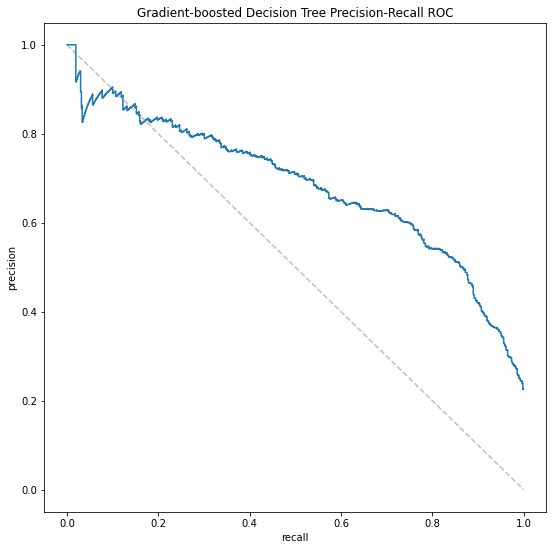

In [124]:
precCrv_bdt, recCrv_bdt, thlds_bdt = mt.precision_recall_curve(
    shopIntent_df[ModelTarget_bdt].iloc[testingSetIndices], 
    preds_probas_bdt[:,1], pos_label=1)

fig4, ax4 = plt.subplots(nrows=1, ncols=1)
fig4.set_size_inches(9, 9)
ax4.plot([0., 1.],[1., 0], '--', color='gray', alpha=0.5)
ax4.step(recCrv_bdt, precCrv_bdt)
ax4.set_xlabel('recall')
ax4.set_ylabel('precision')
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])
ax4.set_title('Gradient-boosted Decision Tree Precision-Recall ROC')

In [121]:
mt.roc_auc_score(shopIntent_df[ModelTarget_bdt].iloc[testingSetIndices], preds_probas_bdt[:,1])

0.9203374176191573

In [122]:
mt.accuracy_score(shopIntent_df[ModelTarget].iloc[testingSetIndices], preds_bdt)

0.8872668288726683

In [123]:
mt.confusion_matrix(preds_bdt == True, 
                    shopIntent_df[ModelTarget_bdt].iloc[testingSetIndices], 
                    labels=[True, False])

array([[ 330,  175],
       [ 242, 2952]])

According to the numbers, the gradient-boosted decsion tree ensemble out-performs the bagged SVC ensemble model in terms of Precision-Recall AUC score as well as accuracy.